In [10]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import import_ipynb
import ppca_altopt
import pickle
import numpy as np

In [11]:
with open('data/mnist_small_py2_3.pkl', 'rb') as f:
    data = pickle.load(f)

In [12]:
X = data['X']
X.shape

(10000, 784)

### Driver function to plot clustering results

In [20]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

def visualize(X, labels, title):
    """
    Plots the clustering results on dataset X with labels given. Also, saves the files in the same directory.
    """
    plt.figure(figsize=(15,10))
    plt.title(title)
    plt.xlabel('Axis 1')
    plt.ylabel('Axis 2')
    
    for label in np.unique(labels):
        plt.scatter(X[labels==label][:,0], X[labels==label][:,1], label='Class '+ str(label+1))
    plt.legend()
    plt.savefig(title+'_kMeans.png')
    plt.show()

### kMeans on PCA transformed data 

In [ ]:
Z, W = ppca_altopt.alt_opt_ppca(X, 2)

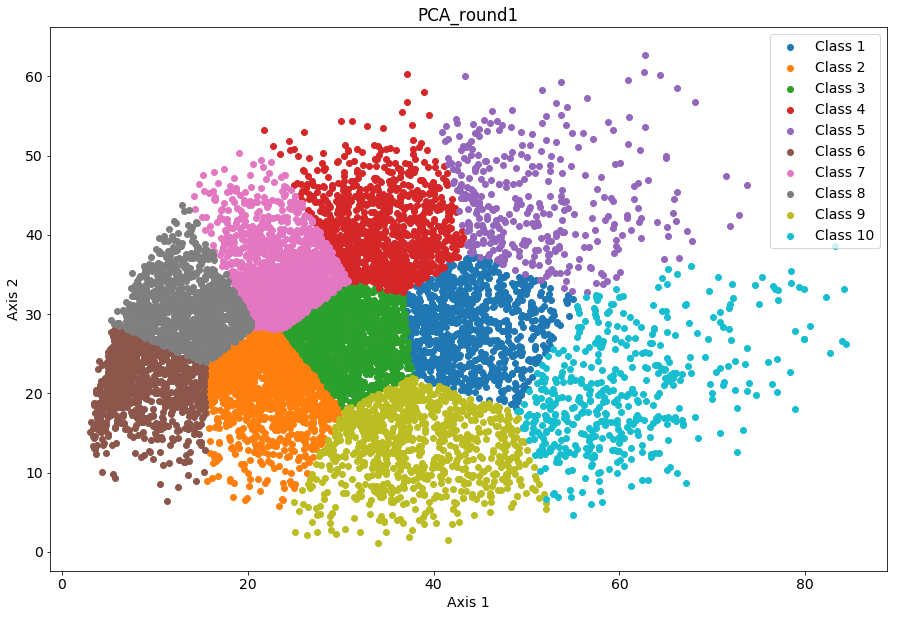

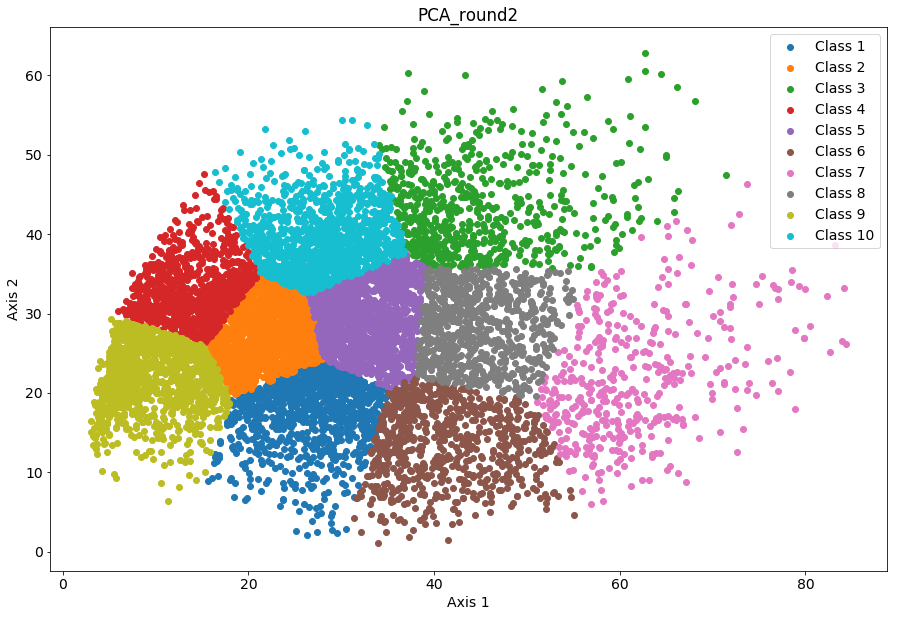

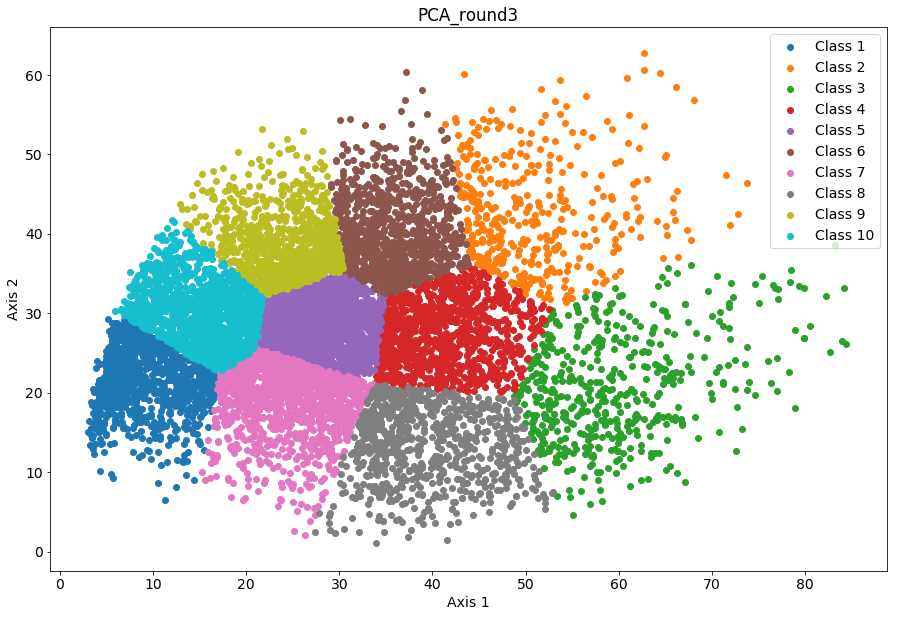

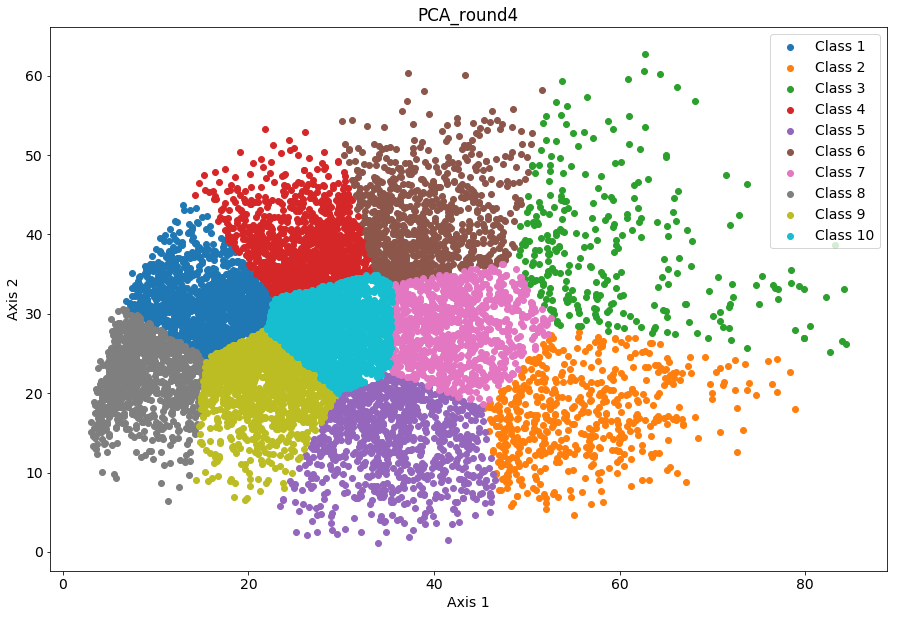

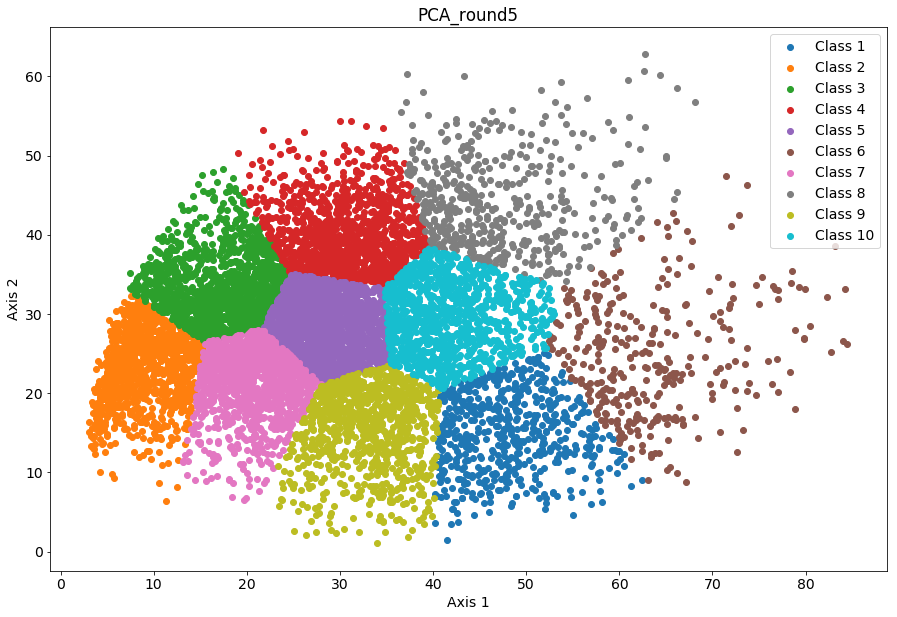

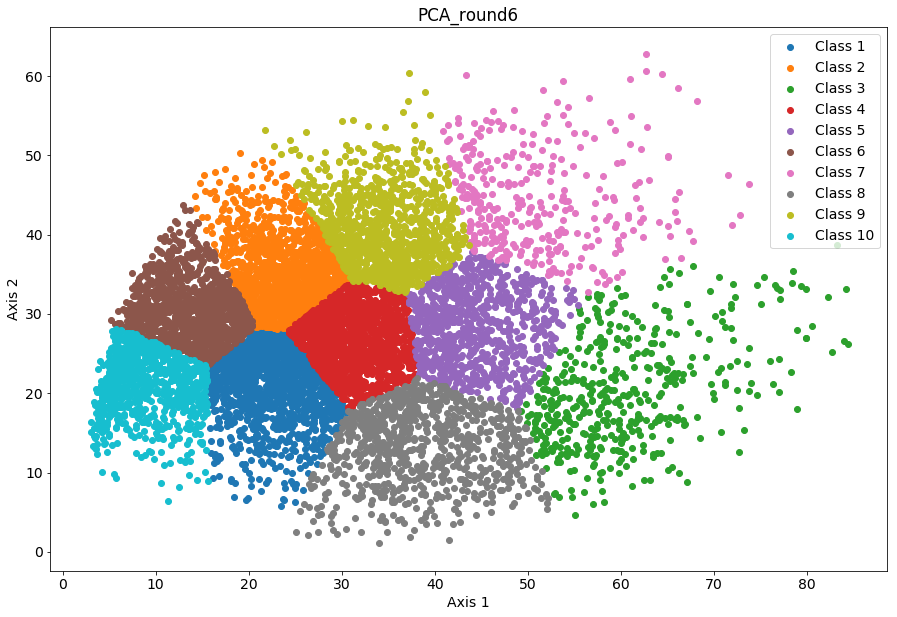

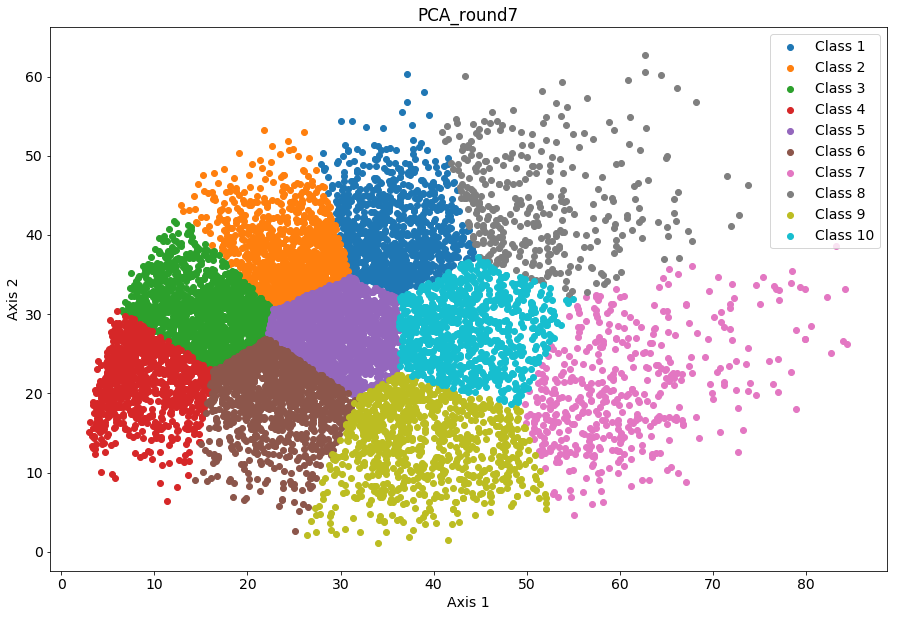

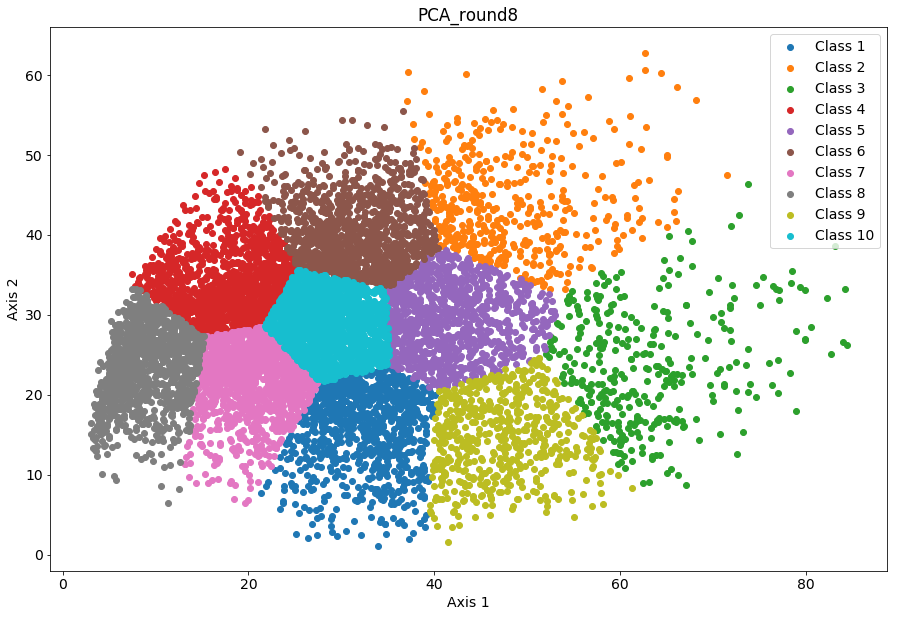

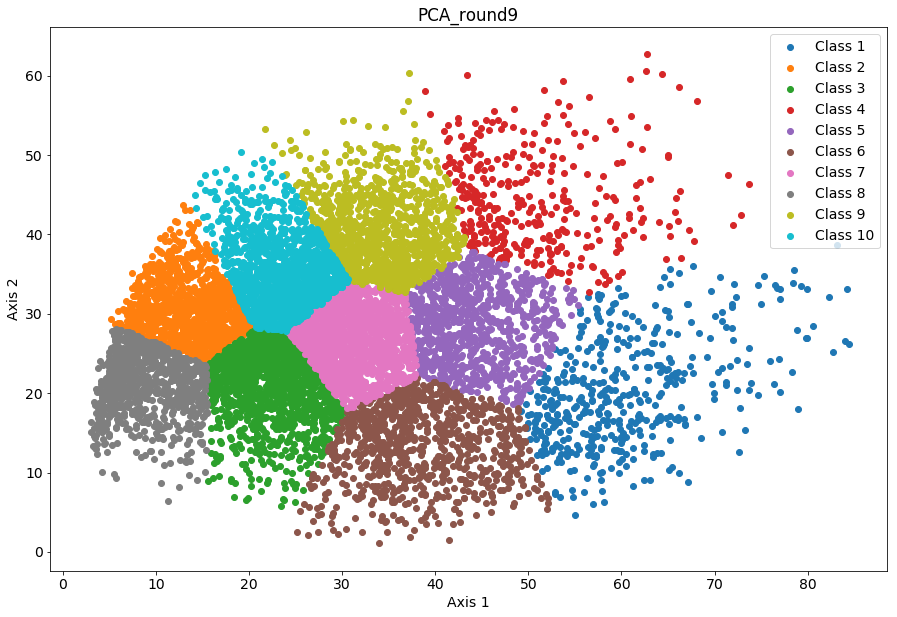

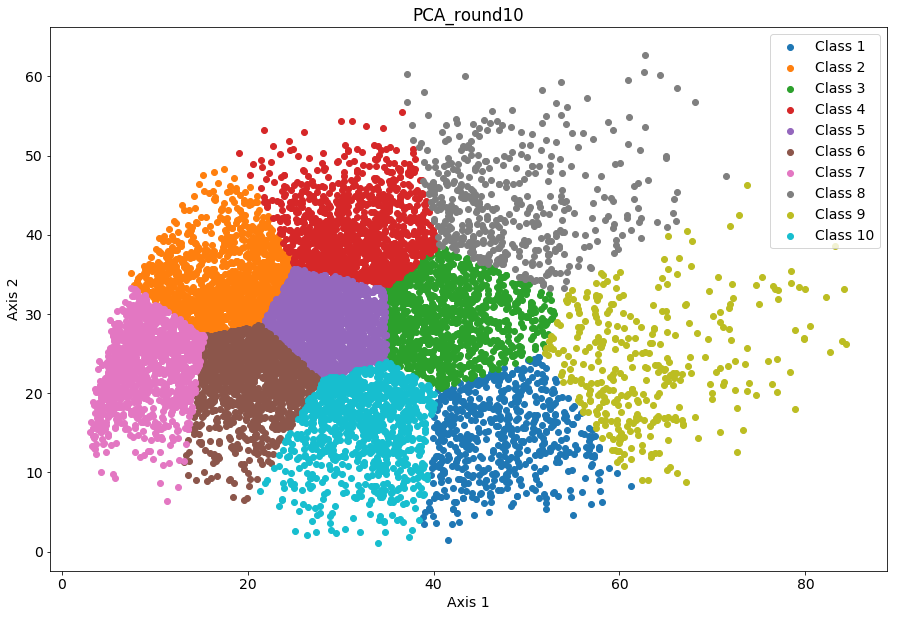

In [19]:
# Running the k means with 10 different random initializations
for i in range(10):
    indices = np.random.randint(Z.shape[0], size=(10))
    init_data = Z[indices, :]
    kmeans = KMeans(n_clusters=10, random_state=0, init=init_data, n_init=1).fit(Z)
    labels = kmeans.labels_
    visualize(Z, labels, 'PCA_round'+str(i+1))

### kMeans on tSNE transformed data

In [21]:
Z_tsne = TSNE(n_components=2).fit_transform(X)

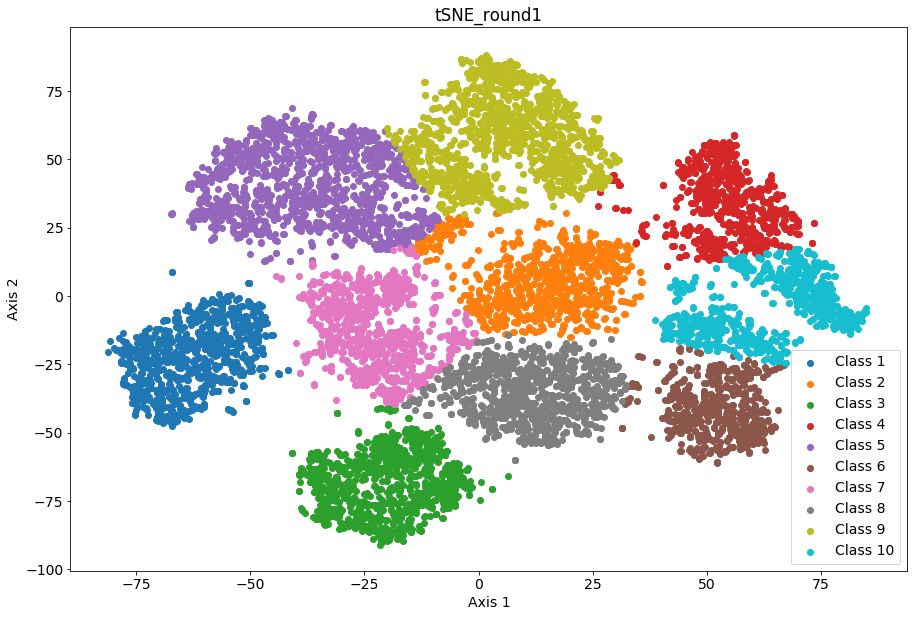

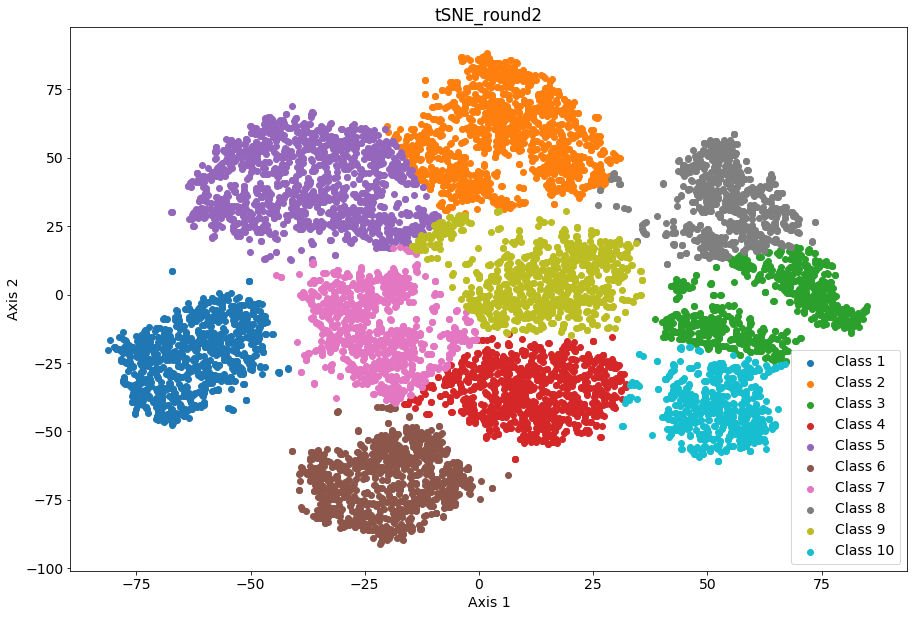

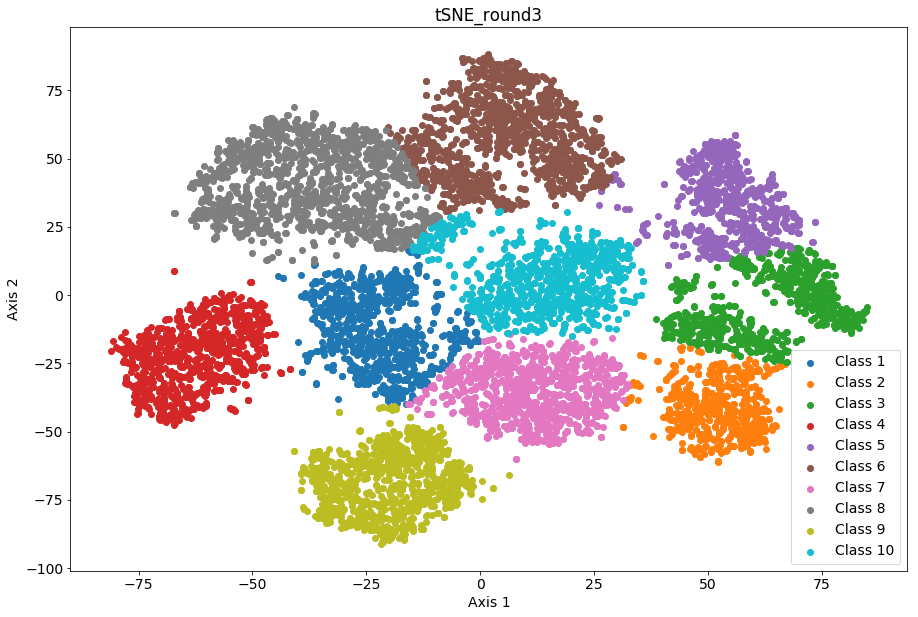

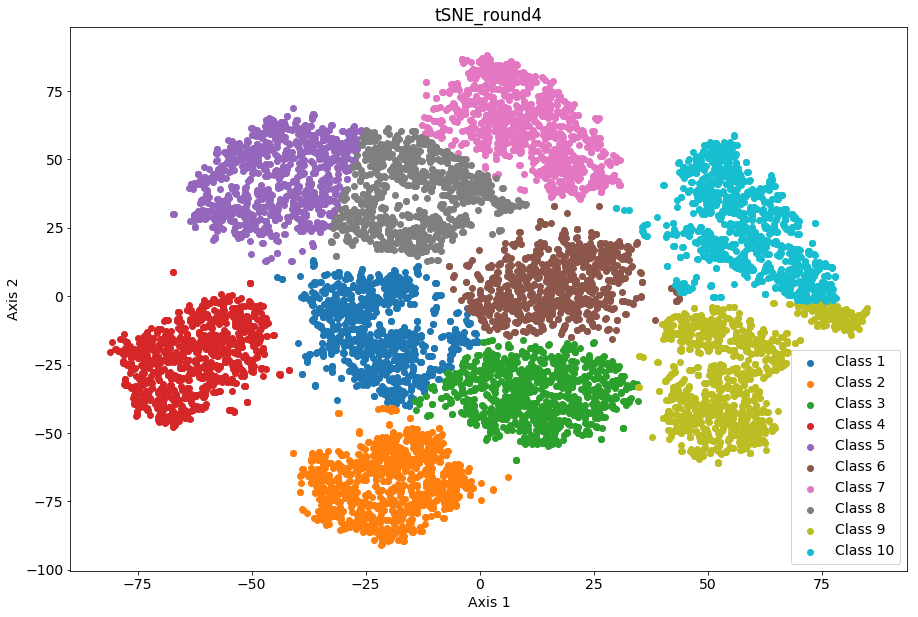

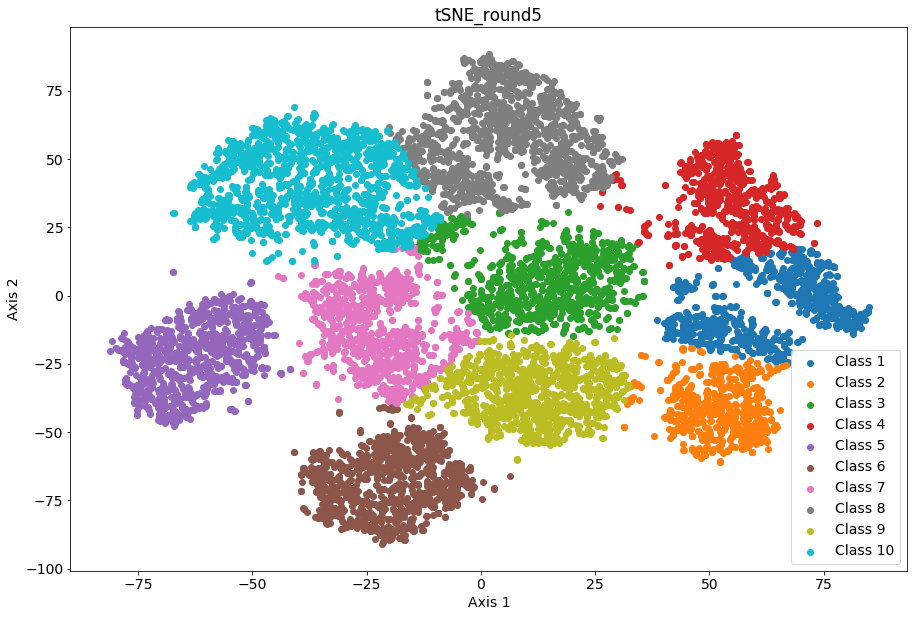

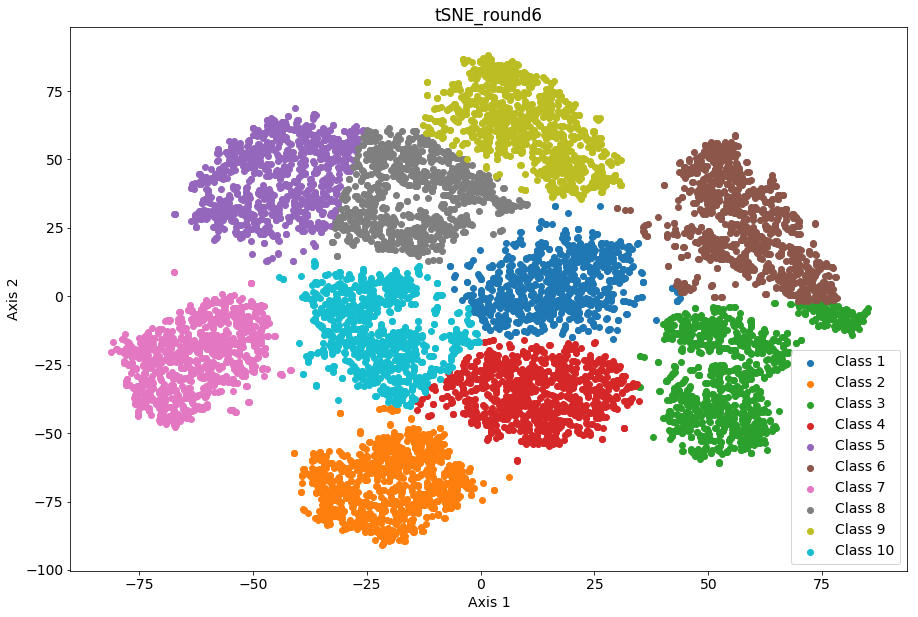

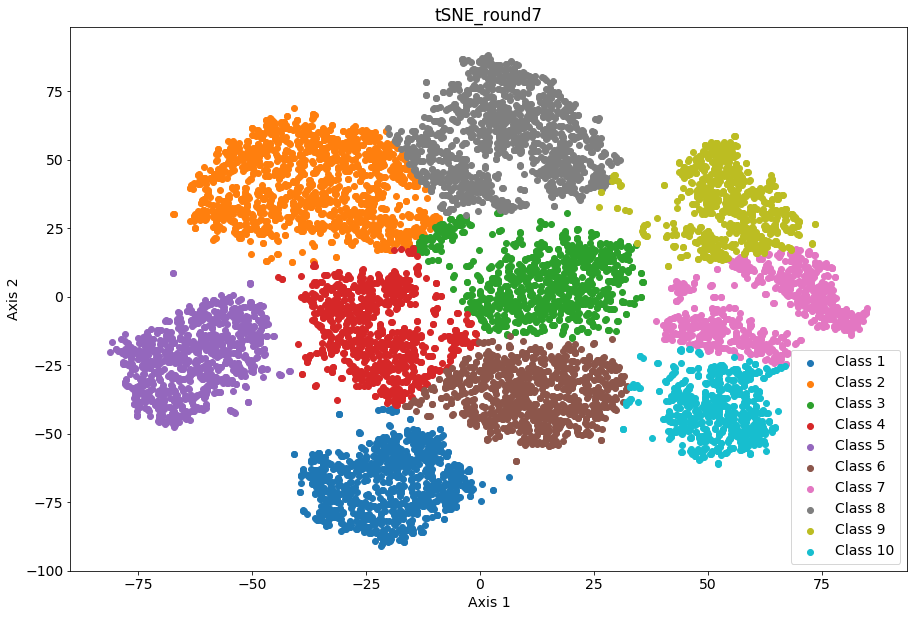

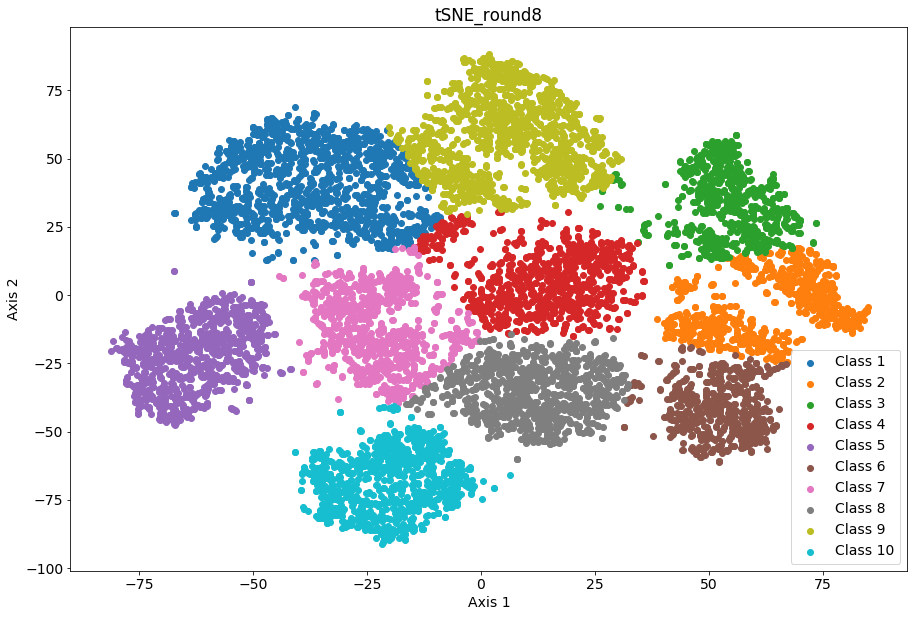

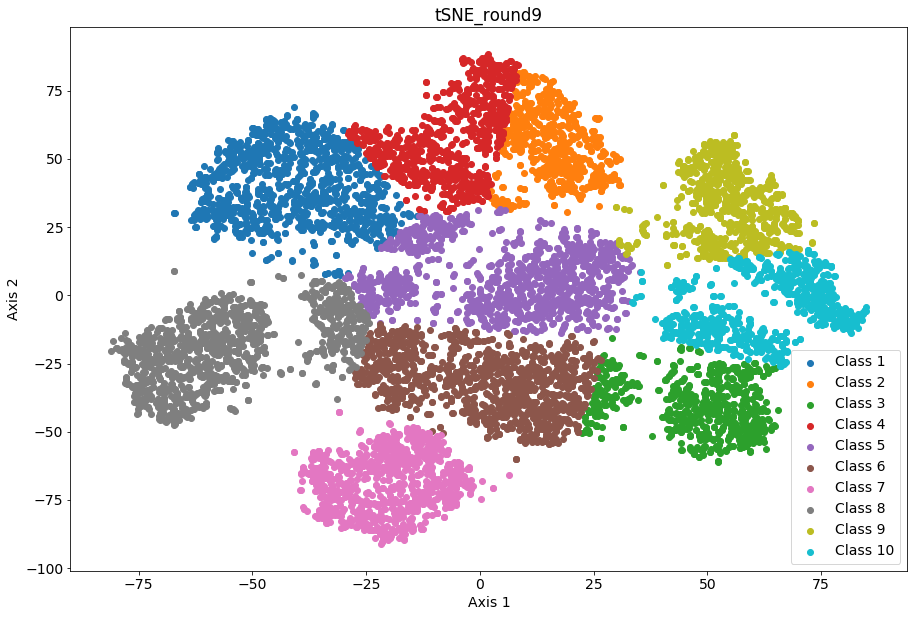

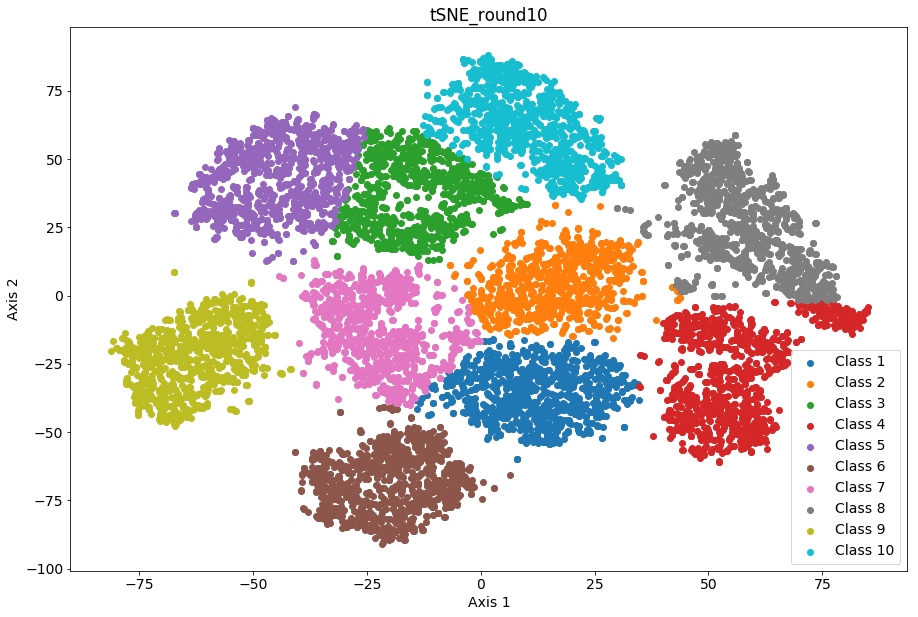

In [22]:
# Running the k means with 10 different random initializations
for i in range(10):
    indices = np.random.randint(Z_tsne.shape[0], size=(10))
    init_data = Z_tsne[indices, :]
    kmeans = KMeans(n_clusters=10, random_state=0, init=init_data, n_init=1).fit(Z_tsne)
    labels = kmeans.labels_
    visualize(Z_tsne, labels, 'tSNE_round'+str(i+1))